# Frequent-Pattern Analysis

**CS5483 Data Warehousing and Data Mining**
$\def\abs#1{\left\lvert #1 \right\rvert}
\def\Set#1{\left\{ #1 \right\}}
\def\mc#1{\mathcal{#1}}
\def\M#1{\boldsymbol{#1}}
\def\R#1{\mathsf{#1}}
\def\RM#1{\boldsymbol{\mathsf{#1}}}
\def\op#1{\operatorname{#1}}
\def\E{\op{E}}
\def\d{\mathrm{\mathstrut d}}
$
___

$\def\abs#1{\left\lvert #1 \right\rvert}
\def\Set#1{\left\{ #1 \right\}}
\def\mc#1{\mathcal{#1}}
\def\M#1{\boldsymbol{#1}}
\def\R#1{\mathsf{#1}}
\def\RM#1{\boldsymbol{\mathsf{#1}}}
\def\op#1{\operatorname{#1}}
\def\E{\op{E}}
\def\d{\mathrm{\mathstrut d}}
$

In [1]:
%reset -f
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# produce vector inline graphics
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('svg')
from ipywidgets import interact
import ipywidgets as widgets
import weka.core.jvm as jvm
from weka.core.converters import Loader
from weka.associations import Associator
import javabridge

## Association Rule Mining using Weka

We will conduct the market-basket analysis on the supermarket dataset in Weka.

### Transaction data

Each instance of the dataset is a transaction, i.e., the purchase of items in a supermarket by a customer. Mathematically, the dataset can be represented by

\begin{align}
D &:= \Set{T_i}_{i=1}^{n} \quad \text{where}\\
T_i&\subseteq \mathcal{I},
\end{align}

and $\mathcal{I}$ is the collection of all items. A transaction $T_i$ is simply a subset of items.

Using the Explorer interface, load the `supermarket.arff` dataset in Weka. 

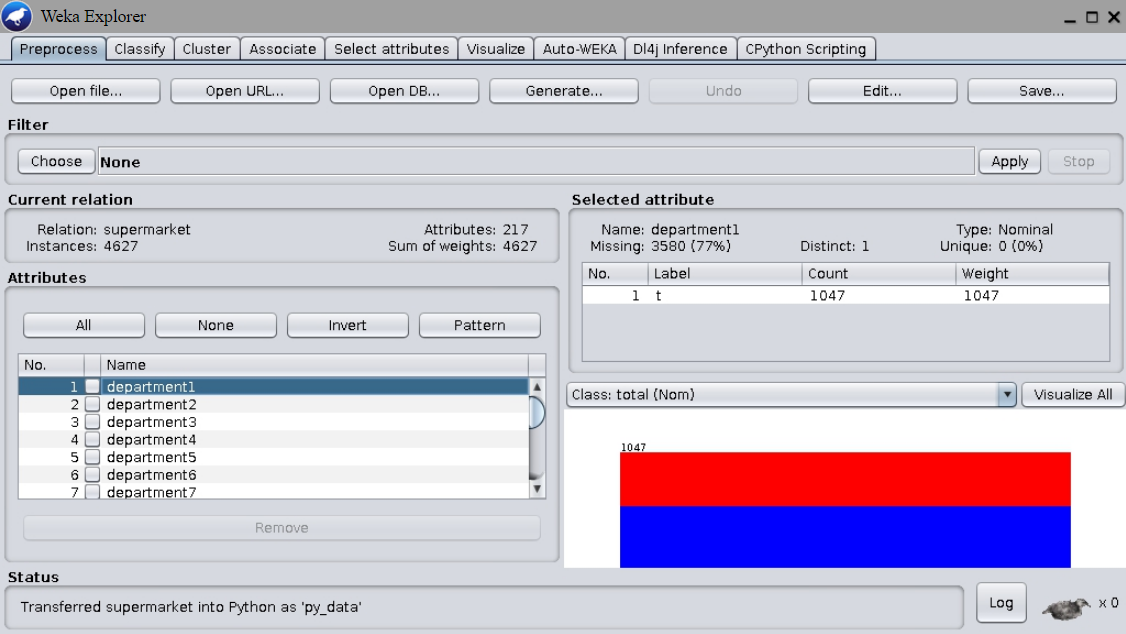

Note that most attribute contains only one possible value, namely `t`. Click the button `Edit...` to open the data editor. Observe that most attributes have missing valu:

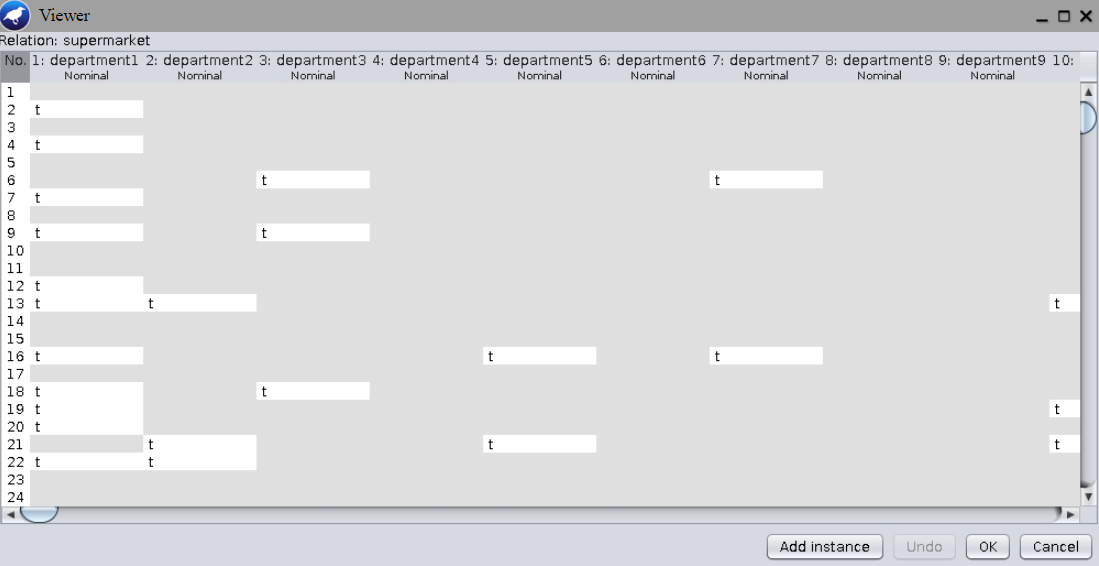

In `supermarket.arff`:
- Each attribute specified by `@attribute` can be a product category, a department, or a product with one possible value `t`:
```
...
@attribute 'grocery misc' { t}
@attribute 'department11' { t}
@attribute 'baby needs' { t}
@attribute 'bread and cake' { t}
...
```
- The last attribute `'total'` has two possible values `{low, high}`: 
```
@attribute 'total' { low, high} % low < 100
```

To understand the dataset further:
1. Select the `Associate` tab. By default, `Apriori` is chosen as the `Associator`.
1. Open the `GenericObjectEditor` and check that there is a parameter called `treatZeroAsMissing`. Hover the mouse pointer over the parameter to see more details. 
1. Run the Apriori algorithm with different choices of the parameter `treatZeroAsMissing`. Observe the diference in the generated rules.

**Exercise** Explain what `t` and `?` means in the dataset when we set `treatZeroAsMissing` to `True` and `False` respectively.

*Hint:* See the [documentation](https://weka.sourceforge.io/doc.dev/weka/associations/Apriori.html) of `Apriori` `Associator`.

YOUR ANSWER HERE

### Association rules

An association rule can be represent as

\begin{align}
A \implies B,
\end{align}

which means that a transaction contains all items in $B$ if it contains all items in $A$, i.e.,

\begin{align}
\underbrace{A\subseteq T}_{\text{premise}} \implies \underbrace{B\subseteq T}_{\text{consequence}}
\end{align}

for transaction $T\in D$. 

We will use [`python-weka-wrapper`](https://github.com/fracpete/python-weka-wrapper3-examples/blob/master/src/wekaexamples/associations/apriori_output.py) for illustration. To load the dataset:

In [ ]:
jvm.start()
from weka.core.converters import Loader
loader = Loader(classname="weka.core.converters.ArffLoader")
weka_data_path = 'https://raw.githubusercontent.com/Waikato/weka-3.8/master/wekadocs/data/'
dataset = loader.load_url(
    weka_data_path +
    'supermarket.arff')  # use load_file to load from file instead

To apply the apriori algorithm with the default settings:

In [ ]:
from weka.associations import Associator

apriori = Associator(classname="weka.associations.Apriori")
apriori.build_associations(dataset)
apriori

**Exercise** Explain what the first rule means according to the notation $A\implies B$.

*Hint:* Note that `biscuits=t` and `total=high` are both regarded as items. Since `total` has to possible values, it is associated with two items, the other one being `total=low`. 

The first rule means that if a customer buys biscuits, frozen foods, fruit, and has a high total value, he/she will buy bread and cake.

To retrieve the rules as a list, and print the first rule:

In [ ]:
rules = list(apriori.association_rules())
rules[0]

To obtain the set $A$ (in premise) and $B$ (in consequence):

In [ ]:
rules[0].premise, rules[0].consequence

In [ ]:
premise_support = rules[0].premise_support 
total_support = rules[0].total_support 


The apriori algorithm returns rules with large enough support:
\begin{align}
\op{support}(A \implies B) &= \op{support}(A \cup B) :=
\frac{\op{count}(A \cup B)}{|D|}\quad \text{where}\\
\op{count(A \cup B)} &:= \abs{\Set{T\in D|T\supseteq A\cup B}}.
\end{align}

In words, support is the fraction of transactions containing both $A$ and $B$.

For the first rule, the number 723 at the end of the rule corresponds to the total support count $\op{count}(A\cup B)$.

**Exercise** Assign to `support` the (fractional) support for the first rule (`rules[0]`). 

*Hint:* In `python-weka-wrapper`, you can use the properties `total_support` and `total_transactions` of `rules[0]`.

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()
support

In [ ]:
# tests

By default, the rules are ranked by confidence. 

\begin{align}
\op{confidence}(A\implies B) &:= \frac{\op{support(A \cup B)}}{\op{support(A)}},
\end{align}

where the denominator $\op{support}(A)$ is the support of the premise. It gives, out of the transactions containing $A$, the fraction of transactions containing $B$.

`<conf:(0.92)> lift:(1.27) lev:(0.03) conv:(3.35)` at the end of the first rule indicates with that confidence is used for ranking the rules and the rule has a confidence of 0.92. In `python-weka-wrapper`, we can print different metrics as follows:

In [ ]:
for n, v in zip(rules[0].metric_names, rules[0].metric_values):
    print(f'{n}: {v:.3g}')

**Exercise** Assign to `premise_support` the support count $\op{count}(A)$ of the premise for the first rule.

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()
premise_support

In [ ]:
# tests

Lift is another rule quality measure defined as

\begin{align}
\op{lift}(A\implies B) &:= \frac{\op{confidence}(A\implies B)}{\op{support(B)}}\\
&= \frac{\op{support(A \cup B)}}{\op{support(A)}\op{support(B)}}.
\end{align}

$\op{support}(B)$ in the denominator is the support of the consequence, which can be rewritten as 

\begin{align}
\op{confidence}(\emptyset \implies B) &= \frac{\op{support}(B)}{\op{support}(\emptyset)} = \op{support}(B)
\end{align}

and so

\begin{align}
\op{lift}(A\implies B) &:= \frac{\op{confidence}(A\implies B)}{\op{confidence}(\emptyset \implies B)}.
\end{align}

In other words, lift is the fractional increase in confidence by imposing the premise.

**Exercise** In Weka, we can change the parameter `metricType` to rank the rule according to `Lift` instead of `Confidence`. Run the algorithm again with `metricType = Lift`. Assign to `lift` the maximum lift achieved. For `python-weka-wrapper`, you can specify the option as follows:

```Python
apriori_lift = Associator(classname="weka.associations.Apriori", options=['-T', '1'])
...
```
where the value `1` corresponds to `Lift`.

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()
lift

In [ ]:
# tests

**Exercise** What is the relationship between the first and second rule? Explain your answer based on the symmetry of lift.

From the [documentation](https://weka.sourceforge.io/doc.dev/weka/associations/Apriori.html), the apriori algorithm in Weka reduces the minimum support until it obtains a specified number (default: 10) of rules with specified minimum metric value for the metric type.

**Exercise** Explain why the maximum lift obtained by ranking the rules using `Lift` is smaller than 1.27, which is the lift obtained before by ranking rules using `Confidence`.  

YOUR ANSWER HERE